Júlia Masson RM 98134

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv("insurance.csv")

In [6]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Convertendo variáveis categóricas em numéricas:

In [9]:
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['smoker'] = labelencoder.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['region'], drop_first=True)

Separando as características (X) e o alvo (y):

In [10]:
X = data.drop('charges', axis=1)
y = data['charges']

Dividindo o dataset em conjunto de treinamento e teste:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Treinando o modelo de Regressão Linear:

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Fazendo previsões no conjunto de teste:

In [14]:
y_pred = model.predict(X_test)

Avaliando o modelo:

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31827950.229523845
R-squared: 0.7999876970680433


Visualizando os resultados:

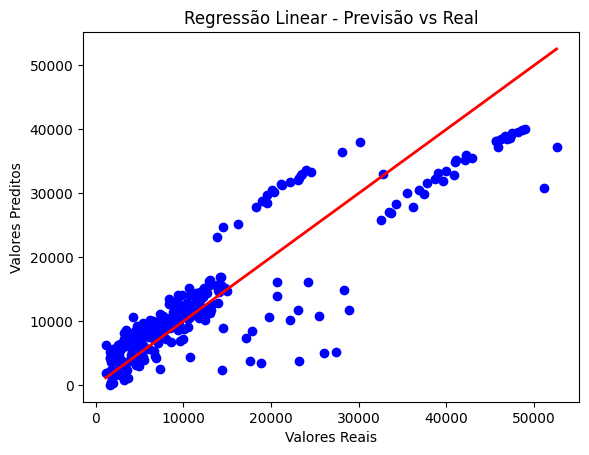

In [17]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Linear - Previsão vs Real')
plt.show()